# Matplotlib

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt ## matplotlib

## 데이터 준비

### K리그 경기기록 데이터프레임 사용 (df)
```python
fw = df[df['pos'] == 'FW'] # 공격수만
fw_gb = fw.groupby('p_id')
fw_df = pd.DataFrame( {'play':fw_gb['p_id'].count(),
                       'goal':fw_gb['goal'].sum(),
                       'assist':fw_gb['assist'].sum(),
                       'st':fw_gb['st'].sum()})
fw_df.to_csv('k_league_fw_goals.csv')
```

### 리버풀 14/15 시즌 승패
```python
liverpool = team_analysis(working_df, 'Liverpool')
working_df.set_index('Date', inplace=True)
liverpool.to_csv('liverpool_14_15.csv')
```

### 커피전문점 데이터
```python
s = pd.read_csv('starbucks.csv')
e = pd.read_csv('ediya.csv')
a = pd.read_csv('angelinus.csv')
c = pd.read_csv('caffebene.csv')
df = pd.concat([s, e, a, c])
df.to_csv('seac_coffee.csv')
```

In [2]:
from dateutil import parser

k = pd.read_csv('k_league_fw_goals.csv', index_col=0)
l = pd.read_csv('liverpool_14_15.csv', index_col=0, date_parser=parser.parse)
c = pd.read_csv('seac_coffee.csv')

In [3]:
c.head()

,Unnamed: 0,A,C,E,S
0,서울특별시 강남구,26,40,53,61
1,경기도 수원시,30,27,39,18
2,서울특별시 서초구,10,23,27,37
3,경기도 성남시,8,23,48,33
4,경기도 용인시,14,22,21,17


In [4]:
l.head()

,Opponent,GF,GA,FTR,Home,Win,CumWin,Lost,CumLost,Point,CumPoint
Date,,,,,,,,,,,
2014-08-17,Southampton,1,2,W,True,1,1,0,0,3,3
2014-08-25,Man City,3,1,L,False,0,1,1,1,0,3
2014-08-31,Tottenham,0,3,W,False,1,2,0,1,3,6
2014-09-13,Aston Villa,1,0,L,True,0,2,1,2,0,6
2014-09-20,West Ham,3,1,L,False,0,2,1,3,0,6


In [5]:
k.head()

,assist,goal,play,st
p_id,,,,
19930001,0,0,4,3
19940002,0,0,1,1
19940003,0,1,5,12
19970002,0,0,6,7
19970004,0,0,3,2


## Line Chart

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

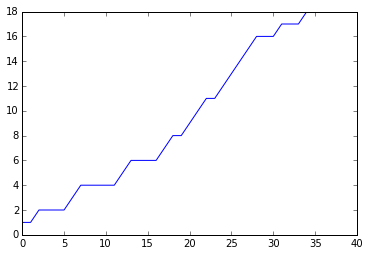

In [6]:
plt.plot(l['CumWin'])

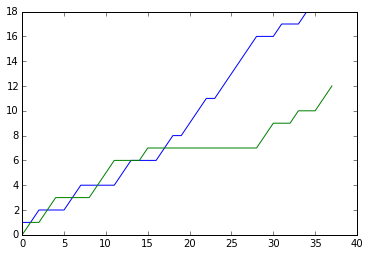

In [7]:
plt.plot(l[['CumWin', 'CumLost']])

ValueError: could not convert string to float: '경상남도 함양군'

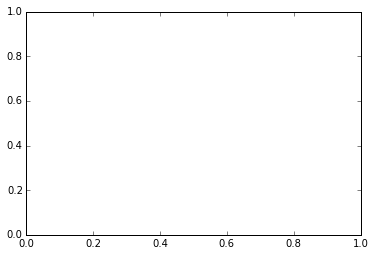

In [8]:
plt.plot(c) # ValueError

In [ ]:
plt.plot(c[['A', 'C', 'E', 'S']]) # Bad

## Bar Chart

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar

```python
matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None, **kwargs)
```

<Container object of 4 artists>

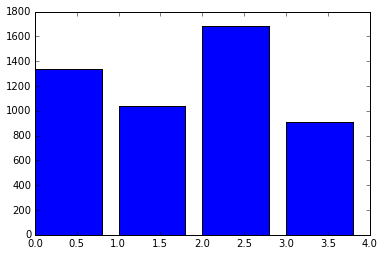

In [9]:
# matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None, **kwargs)
plt.bar(np.arange(4), c[['A', 'C', 'E', 'S']].sum().values)

([<matplotlib.axis.XTick at 0x10aed0f98>,
 <a list of 4 Text xticklabel objects>)

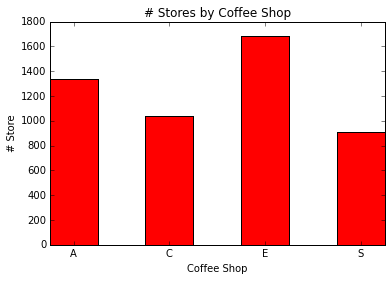

In [10]:
coffee_data = c[['A', 'C', 'E', 'S']].sum().values
coffee_index = np.arange(len(coffee_data))
bar_width = 0.5
plt.bar(coffee_index, coffee_data, width=bar_width, color='r')
plt.title('# Stores by Coffee Shop')
plt.xlabel('Coffee Shop')
plt.ylabel('# Store')
plt.xticks(coffee_index + bar_width - 0.25, ('A', 'C', 'E', 'S'))

([<matplotlib.axis.YTick at 0x10aed0400>,
 <a list of 4 Text yticklabel objects>)

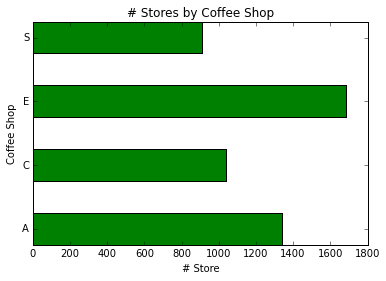

In [11]:
bar_height = 0.5
plt.barh(coffee_index, coffee_data, height=bar_height, color='g')
plt.title('# Stores by Coffee Shop')
plt.ylabel('Coffee Shop')
plt.xlabel('# Store')
plt.yticks(coffee_index + bar_width - 0.25, ('A', 'C', 'E', 'S'))

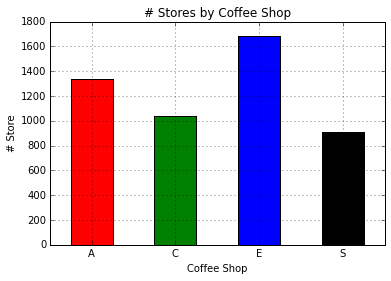

In [12]:
coffee_data = c[['A', 'C', 'E', 'S']].sum().values
coffee_index = np.arange(len(coffee_data))
bar_width = 0.5
my_colors = 'rgbk' #red, green, blue, black.
plt.bar(coffee_index, coffee_data, width=bar_width, color=my_colors)
plt.title('# Stores by Coffee Shop')
plt.xlabel('Coffee Shop')
plt.ylabel('# Store')

plt.xlim(min(coffee_index) - bar_width/2, max(coffee_index+1) - bar_width/2)

plt.xticks(coffee_index + bar_width/2, ('A', 'C', 'E', 'S'))

plt.grid(b=True, axis="both") # 그리드

### 스타일

#### color

* Pre-Defined color
 * b: blue
 * g: green
 * r: red
 * c: cyan
 * m: magenta
 * y: yellow
 * k: black
 * w: white

* Grayscale (0 - 1)
```python
color = '0.75'
```

* HTML Hex String
```python
color = '#eeefff'
```

#### line
* '-' 	solid
* '--' 	dashed
* '-.' 	dash_dot
* ':' 	dotted
* 'None' 	draw nothing
* ' ' 	draw nothing
* '' 	draw nothing

#### marker
[http://matplotlib.org/api/markers_api.html#module-matplotlib.markers](http://matplotlib.org/api/markers_api.html#module-matplotlib.markers)

#### 조합
* 'k--'
* 'g-.'
* 'r:'
* 'ko--'

#### 제목
```python
set_title()
```

#### 라벨
```python
set_xticklabels()
set_yticklabels()
```

#### 범례
```python
legend()
```

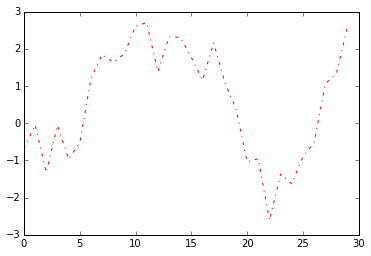

In [13]:
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'r-.')

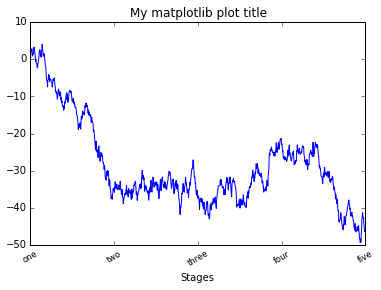

In [14]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My matplotlib plot title')
ax.set_xlabel('Stages')

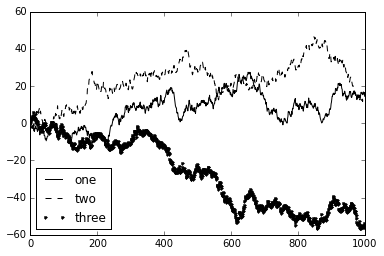

In [15]:
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## 히스토그램

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

```python
matplotlib.pyplot.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
```

(array([   3.,   11.,   54.,  153.,  285.,  256.,  163.,   65.,    7.,    3.]),
 array([-3.56401464, -2.84468063, -2.12534663, -1.40601263, -0.68667863,
         0.03265537,  0.75198937,  1.47132337,  2.19065737,  2.90999137,
         3.62932538]),
 <a list of 10 Patch objects>)

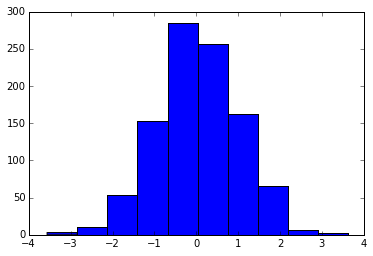

In [16]:
d = np.random.randn(1000)
plt.hist(d, bins=10)

## Pie Chart

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie

```python
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)
```


```python
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis
plt.axis('equal') # x, y축이 동일한 척도를 가지도록
```

(-1.25, 1.25, -1.25, 1.25)

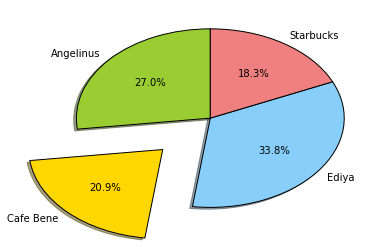

In [17]:
labels = ('Angelinus', 'Cafe Bene', 'Ediya', 'Starbucks')
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(coffee_data, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=(0, 0.5, 0, 0))
plt.axis('off')

### Scatter Chart

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

```python
matplotlib.pyplot.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
```

/Users/scari/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


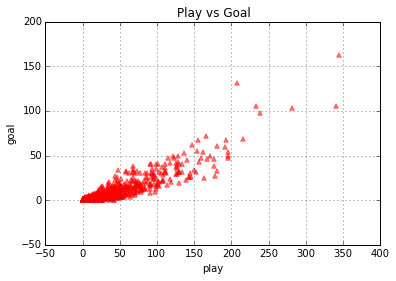

In [18]:
fig, ax = plt.subplots()
ax.scatter(k['play'], k['goal'], alpha=0.5, color='r', marker='^')
ax.set_xlabel('play')
ax.set_ylabel('goal')
ax.set_title('Play vs Goal')
ax.grid(True)
# fontsize, color, ax.grid

### Figure와 subplot

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots
```
matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
```

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b73e438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10baafbe0>], dtype=object)

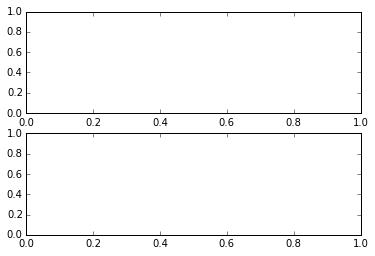

In [19]:
fig, axes = plt.subplots(2, 1)
axes

/Users/scari/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


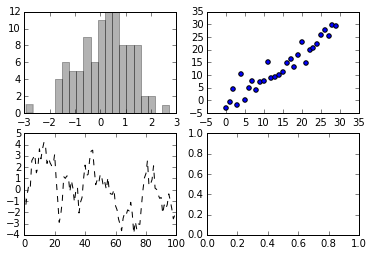

In [20]:
fig, axes = plt.subplots(2,2)

axes[0][0].hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
axes[0][1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

d = np.random.randn(100)
axes[1][0].plot(d.cumsum(), 'k--')

### subplot 간격 조절하기
```python
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

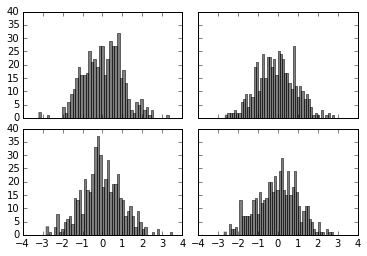

In [21]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)

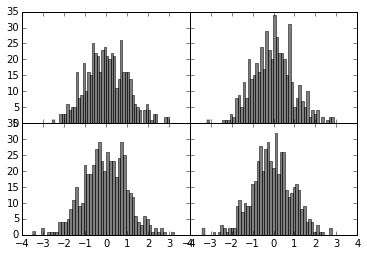

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Annotation

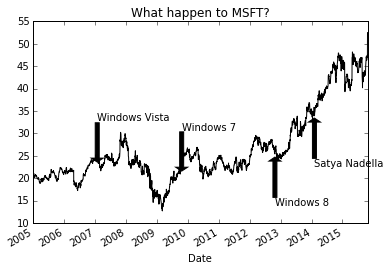

In [23]:
from pandas_datareader import data, wb
# pip install pandas-datareader
#from pandas.io.data import DataReader
from datetime import datetime

# Microsoft
msft = data.DataReader('MSFT',  'yahoo', datetime(2005,1,1), datetime(2015,10,25))['Adj Close']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

msft.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 1, 30), 'Windows Vista'),
    (datetime(2009, 10, 22), 'Windows 7'),
    (datetime(2012, 10, 26), 'Windows 8'),
    (datetime(2014, 2, 4), 'Satya Nadella'),
]


for date, label in crisis_data:
    y_pos = 10
    if label in ['Windows 8', 'Satya Nadella']:
        y_pos = -10
    ax.annotate(label, xy = (date, msft.asof(date) - 1),
                xytext = (date, msft.asof(date) + y_pos),
                arrowprops = dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')


# Zoom in on 2007-2010
ax.set_xlim(['1/1/2005', '10/25/2015'])
#ax.set_ylim([5, 80])

ax.set_title('What happen to MSFT?')


### xkcd 스타일

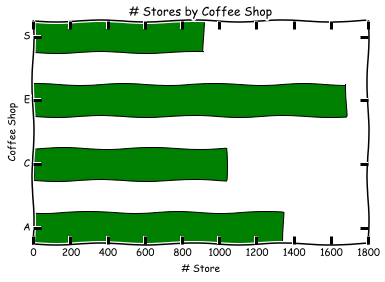

In [24]:
with plt.xkcd():
    bar_height = 0.5
    plt.barh(coffee_index, coffee_data, height=bar_height, color='g')
    plt.title('# Stores by Coffee Shop')
    plt.ylabel('Coffee Shop')
    plt.xlabel('# Store')
    plt.yticks(coffee_index + bar_width - 0.25, ('A', 'C', 'E', 'S'))


### 환경설정

사용할 수 있는 스타일.
* 'ggplot', 'fivethirtyeight', 'dark_background', 'grayscale', 'bmh'

In [ ]:
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]

In [ ]:
from matplotlib import rcParams, style

style.use('ggplot')
rcParams['font.family'] = 'NanumGothicOTF'
rcParams['font.size'] = 12